In [502]:
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Question 1

In [503]:
stock_data = np.genfromtxt('stock_prediction_data.csv', delimiter=',')
stock_data

array([[5.23, 1.32, 2.85, ..., 7.77, 1.15, 1.49],
       [5.92, 0.58, 6.34, ..., 3.97, 2.35, 2.71],
       [8.95, 3.82, 7.69, ..., 6.77, 3.08, 6.46],
       ...,
       [6.92, 7.98, 8.6 , ..., 5.25, 2.67, 3.19],
       [5.76, 2.  , 4.51, ..., 3.39, 2.3 , 0.4 ],
       [4.58, 1.49, 6.42, ..., 6.77, 8.73, 1.  ]])

In [504]:
stock_price = np.genfromtxt('stock_price.csv', delimiter=',').reshape(-1, 1)
stock_price

array([[-3.100e-01],
       [-1.686e+01],
       [ 1.360e+00],
       [ 1.275e+01],
       [ 7.910e+00],
       [-2.750e+00],
       [-5.400e-01],
       [-1.151e+01],
       [-4.010e+00],
       [ 3.080e+00],
       [-8.230e+00],
       [-1.400e-01],
       [ 2.560e+00],
       [-6.870e+00],
       [ 4.430e+00],
       [ 1.980e+00],
       [ 3.760e+00],
       [ 4.160e+00],
       [ 6.670e+00],
       [-7.210e+00],
       [ 3.220e+00],
       [ 1.100e+01],
       [-2.150e+00],
       [ 6.330e+00],
       [-4.350e+00],
       [ 1.300e-01],
       [ 7.070e+00],
       [ 6.390e+00],
       [-3.050e+00],
       [ 4.670e+00],
       [-1.092e+01],
       [-4.370e+00],
       [-3.800e+00],
       [ 6.360e+00],
       [ 5.580e+00],
       [-4.720e+00],
       [-3.620e+00],
       [-8.660e+00],
       [ 8.970e+00],
       [ 4.800e+00],
       [ 6.470e+00],
       [ 3.380e+00],
       [-1.280e+00],
       [-1.309e+01],
       [-1.160e+01],
       [ 8.790e+00],
       [ 4.910e+00],
       [ 1.57

In [505]:
scaler = StandardScaler()
scaler.fit(stock_data)
stock_data = scaler.transform(stock_data)
stock_data

array([[ 0.03891071, -1.21425547, -0.71462266, ...,  0.95265681,
        -1.21992632, -1.26277286],
       [ 0.28137056, -1.46950334,  0.49864483, ..., -0.34370698,
        -0.80916135, -0.84126507],
       [ 1.34608558, -0.35193161,  0.96796033, ...,  0.61150844,
        -0.55927933,  0.45435316],
       ...,
       [ 0.63276166,  1.08297529,  1.28431375, ...,  0.09296293,
        -0.69962402, -0.67542593],
       [ 0.22514799, -0.97970338, -0.13753841, ..., -0.54157303,
        -0.82627656, -1.63936589],
       [-0.1894935 , -1.15561745,  0.52645612, ...,  0.61150844,
         1.37473907, -1.43206698]])

### Sklearn

In [506]:
poly = PolynomialFeatures(1)
Φ = poly.fit_transform(stock_data)

reg = LinearRegression().fit(Φ, stock_price)
print(reg.coef_)
print(reg.intercept_)

pred_y = reg.predict(Φ)
print('Predicted labels')
print(pred_y)

[[ 0.         -0.00632907  4.0017033   0.00964999 -0.00765303  0.99228095
   2.99424287  3.99145859  2.98052853  0.98323214  1.0098116 ]]
[0.86593333]
Predicted labels
[[-2.77741789e-01]
 [-1.66321839e+01]
 [ 1.44950277e+00]
 [ 1.26109733e+01]
 [ 7.84474723e+00]
 [-3.02758959e+00]
 [-3.85142282e-01]
 [-1.10136978e+01]
 [-4.25254287e+00]
 [ 3.46078036e+00]
 [-8.13121973e+00]
 [ 1.79407423e-02]
 [ 2.16249341e+00]
 [-7.01206305e+00]
 [ 4.60592082e+00]
 [ 1.79731019e+00]
 [ 3.78250201e+00]
 [ 3.98687888e+00]
 [ 6.57524977e+00]
 [-7.09064329e+00]
 [ 3.29308838e+00]
 [ 1.06886148e+01]
 [-2.21381706e+00]
 [ 6.35696584e+00]
 [-4.61816092e+00]
 [ 2.01489581e-01]
 [ 7.12585137e+00]
 [ 6.62644056e+00]
 [-3.18777013e+00]
 [ 5.05459400e+00]
 [-1.09701920e+01]
 [-4.27051112e+00]
 [-3.63608904e+00]
 [ 5.87306622e+00]
 [ 5.58074382e+00]
 [-4.92674689e+00]
 [-3.63325478e+00]
 [-8.93287526e+00]
 [ 8.67543969e+00]
 [ 4.94507940e+00]
 [ 6.50569547e+00]
 [ 3.84906859e+00]
 [-1.12230064e+00]
 [-1.33104141e+

### Gradient Descent

In [507]:
n = Φ.shape[0]
d = Φ.shape[1]

In [508]:
w = np.ones((11, 1))
η = 0.01

In [509]:
def f(w, y):
	ε = Φ.dot(w) - y
	mse = (1/n)*ε.T.dot(ε)
	return mse.item()

def fᑊ(w, y):
	ᐁf = np.zeros((d,1))
	for Φᵢ, yᵢ in zip(Φ,y):
		Φᵢ = np.reshape(Φᵢ, (d,1))
		ᐁf += (w.T.dot(Φᵢ) - yᵢ)*Φᵢ
	return (2/n)*ᐁf

In [510]:
f_value_list = []
for i in range(400):
	w = w - η*fᑊ(w, stock_price)
	f_value_list.append(f(w, stock_price))

In [511]:
print('Best w = \n', w)

Best w = 
 [[ 0.8659748 ]
 [-0.00505112]
 [ 3.99990734]
 [ 0.00873234]
 [-0.00712302]
 [ 0.99198405]
 [ 2.99347204]
 [ 3.99043074]
 [ 2.9783672 ]
 [ 0.98253271]
 [ 1.01014366]]


In [512]:
print('Predictions: \n', Φ.dot(w))

Predictions: 
 [[-2.77941149e-01]
 [-1.66259882e+01]
 [ 1.44944244e+00]
 [ 1.26091360e+01]
 [ 7.84065542e+00]
 [-3.02966985e+00]
 [-3.84912036e-01]
 [-1.10125220e+01]
 [-4.24961308e+00]
 [ 3.45801901e+00]
 [-8.12978916e+00]
 [ 1.72128910e-02]
 [ 2.16571619e+00]
 [-7.01197060e+00]
 [ 4.60658145e+00]
 [ 1.79922514e+00]
 [ 3.78071127e+00]
 [ 3.98728127e+00]
 [ 6.56856919e+00]
 [-7.08630374e+00]
 [ 3.29163134e+00]
 [ 1.06850869e+01]
 [-2.21364473e+00]
 [ 6.35310137e+00]
 [-4.61636013e+00]
 [ 1.98213003e-01]
 [ 7.12266776e+00]
 [ 6.62261621e+00]
 [-3.18624200e+00]
 [ 5.05223472e+00]
 [-1.09642540e+01]
 [-4.26743201e+00]
 [-3.63806991e+00]
 [ 5.87215711e+00]
 [ 5.58304391e+00]
 [-4.92456355e+00]
 [-3.63028436e+00]
 [-8.92932188e+00]
 [ 8.67217978e+00]
 [ 4.94536896e+00]
 [ 6.50258299e+00]
 [ 3.85116203e+00]
 [-1.12008841e+00]
 [-1.33020143e+01]
 [-1.16553262e+01]
 [ 8.98217723e+00]
 [ 4.53803683e+00]
 [ 1.54994245e+01]
 [-6.22612834e+00]
 [-3.33454576e+00]
 [-6.95565231e+00]
 [ 4.47652595e+0

### Closed Form Solution

In [513]:
w = np.linalg.inv(Φ.T@Φ) @ Φ.T @ stock_price
w

array([[ 0.86593333],
       [-0.00632907],
       [ 4.0017033 ],
       [ 0.00964999],
       [-0.00765303],
       [ 0.99228095],
       [ 2.99424287],
       [ 3.99145859],
       [ 2.98052853],
       [ 0.98323214],
       [ 1.0098116 ]])

In [514]:
print('Predictions: \n', Φ.dot(w))

Predictions: 
 [[-2.77741789e-01]
 [-1.66321839e+01]
 [ 1.44950277e+00]
 [ 1.26109733e+01]
 [ 7.84474723e+00]
 [-3.02758959e+00]
 [-3.85142282e-01]
 [-1.10136978e+01]
 [-4.25254287e+00]
 [ 3.46078036e+00]
 [-8.13121973e+00]
 [ 1.79407423e-02]
 [ 2.16249341e+00]
 [-7.01206305e+00]
 [ 4.60592082e+00]
 [ 1.79731019e+00]
 [ 3.78250201e+00]
 [ 3.98687888e+00]
 [ 6.57524977e+00]
 [-7.09064329e+00]
 [ 3.29308838e+00]
 [ 1.06886148e+01]
 [-2.21381706e+00]
 [ 6.35696584e+00]
 [-4.61816092e+00]
 [ 2.01489581e-01]
 [ 7.12585137e+00]
 [ 6.62644056e+00]
 [-3.18777013e+00]
 [ 5.05459400e+00]
 [-1.09701920e+01]
 [-4.27051112e+00]
 [-3.63608904e+00]
 [ 5.87306622e+00]
 [ 5.58074382e+00]
 [-4.92674689e+00]
 [-3.63325478e+00]
 [-8.93287526e+00]
 [ 8.67543969e+00]
 [ 4.94507940e+00]
 [ 6.50569547e+00]
 [ 3.84906859e+00]
 [-1.12230064e+00]
 [-1.33104141e+01]
 [-1.16592536e+01]
 [ 8.98364497e+00]
 [ 4.54210657e+00]
 [ 1.55009983e+01]
 [-6.23382676e+00]
 [-3.33666917e+00]
 [-6.95886347e+00]
 [ 4.48019419e+0

## Question 2

### Sklearn

In [515]:
poly = PolynomialFeatures(2)
Φ = poly.fit_transform(stock_data)

reg = LinearRegression().fit(Φ, stock_price)
print(reg.coef_)
print(reg.intercept_)

pred_y = reg.predict(Φ)
print('Predicted labels')
print(pred_y)

[[-1.68998973e-17 -3.56450078e-03  3.99787135e+00  6.58679167e-03
  -9.72501931e-03  9.91626548e-01  2.99946522e+00  3.99574777e+00
   2.98618773e+00  9.84217991e-01  1.01729959e+00 -1.79242456e-02
   1.04764317e-02  1.86408777e-02  1.30226888e-02  1.09571145e-02
  -6.97951563e-03 -3.24639851e-04  2.13249229e-03  8.88376418e-03
  -1.01265135e-02  1.30415313e-02  2.13989537e-03  1.90056572e-02
   3.08312460e-03  6.34634242e-04 -1.15772811e-03  1.46451981e-02
   9.23384611e-03 -2.34482832e-02 -4.27911693e-05 -7.38294809e-03
  -1.19976290e-02 -8.97001508e-03  4.93166627e-03  2.31228484e-02
   6.01111666e-03 -1.98391508e-02  1.95344442e-02 -1.54094194e-02
   4.30293355e-03  5.30749842e-03 -1.56970428e-03  8.41643536e-03
  -1.57925001e-02 -1.02085505e-02  5.01169581e-02 -2.72193593e-02
  -7.22853665e-03 -1.39120096e-03 -1.19712209e-03  1.73444902e-02
  -1.69091402e-02 -4.09935055e-03  1.13227931e-02 -6.78221379e-03
  -6.68214430e-03 -8.09360777e-03  8.37197130e-03  9.60729321e-03
   1.91871

### Gradient Descent

In [516]:
n = Φ.shape[0]
d = Φ.shape[1]
w = np.ones((66, 1))
η = 0.01
def f(w, y):
	ε = Φ.dot(w) - y
	mse = (1/n)*ε.T.dot(ε)
	return mse.item()

def fᑊ(w, y):
	ᐁf = np.zeros((d,1))
	for Φᵢ, yᵢ in zip(Φ,y):
		Φᵢ = np.reshape(Φᵢ, (d,1))
		ᐁf += (w.T.dot(Φᵢ) - yᵢ)*Φᵢ
	return (2/n)*ᐁf
f_value_list = []
for i in range(400):
	w = w - η*fᑊ(w, stock_price)
	f_value_list.append(f(w, stock_price))
print('Best w = \n', w)

Best w = 
 [[ 2.70700862e-01]
 [ 2.19548355e-02]
 [ 3.97992098e+00]
 [ 8.17824166e-03]
 [ 1.49772367e-02]
 [ 9.79525195e-01]
 [ 2.98030721e+00]
 [ 3.99983912e+00]
 [ 2.98243687e+00]
 [ 9.70973478e-01]
 [ 1.00105525e+00]
 [ 2.53944427e-02]
 [ 1.03728677e-02]
 [-7.70176507e-03]
 [ 4.76149638e-03]
 [ 1.69468991e-03]
 [-5.02375134e-03]
 [ 8.34867411e-03]
 [-1.69040343e-03]
 [ 1.23607422e-02]
 [-1.79866423e-02]
 [ 4.41412553e-02]
 [ 1.31898282e-02]
 [ 2.28179764e-02]
 [ 1.52680064e-02]
 [ 2.62905899e-03]
 [ 4.26007585e-03]
 [ 2.57400332e-02]
 [ 3.10842719e-02]
 [-4.76820543e-03]
 [ 7.65535848e-02]
 [ 1.65049210e-02]
 [ 1.69652241e-02]
 [-1.16117645e-03]
 [ 2.15044694e-02]
 [ 7.49249194e-02]
 [ 4.64886821e-02]
 [-4.74858320e-04]
 [ 6.65775666e-02]
 [ 2.57351890e-02]
 [ 9.44811610e-03]
 [-1.02923033e-02]
 [ 1.30460395e-02]
 [ 2.61682188e-02]
 [-2.83314473e-02]
 [ 7.20814498e-02]
 [ 4.93923937e-02]
 [-3.07041063e-02]
 [ 1.11804459e-02]
 [ 1.67051733e-02]
 [-8.40918491e-03]
 [ 9.33021390e-02]
 

In [517]:
print('Predictions: \n', Φ.dot(w))

Predictions: 
 [[-3.60841339e-01]
 [-1.67380113e+01]
 [ 1.41125716e+00]
 [ 1.23373835e+01]
 [ 7.65708876e+00]
 [-3.24042928e+00]
 [-6.61533117e-01]
 [-1.10744458e+01]
 [-4.26162029e+00]
 [ 3.20276501e+00]
 [-8.12198172e+00]
 [-4.36069760e-02]
 [ 2.21297800e+00]
 [-7.03969419e+00]
 [ 4.55241344e+00]
 [ 1.93754705e+00]
 [ 3.59177257e+00]
 [ 3.87396090e+00]
 [ 6.92945860e+00]
 [-7.16145202e+00]
 [ 3.15305605e+00]
 [ 1.07412075e+01]
 [-2.19649051e+00]
 [ 6.28084042e+00]
 [-4.90721128e+00]
 [ 8.84004276e-02]
 [ 7.05803255e+00]
 [ 6.31509725e+00]
 [-3.19798672e+00]
 [ 4.88233502e+00]
 [-1.08806288e+01]
 [-4.39202568e+00]
 [-3.66089190e+00]
 [ 5.86912790e+00]
 [ 5.70601898e+00]
 [-5.05667869e+00]
 [-3.72794661e+00]
 [-8.93639428e+00]
 [ 8.93699089e+00]
 [ 4.76277235e+00]
 [ 6.20871685e+00]
 [ 3.56773564e+00]
 [-1.26565496e+00]
 [-1.34090110e+01]
 [-1.18101251e+01]
 [ 8.91373462e+00]
 [ 4.75872312e+00]
 [ 1.54405006e+01]
 [-6.32609126e+00]
 [-3.27073283e+00]
 [-6.93336151e+00]
 [ 4.13446361e+0

### Closed Form Solution

In [518]:
w = np.linalg.inv(Φ.T@Φ) @ Φ.T @ stock_price
w

array([[ 8.43017267e-01],
       [-3.56450078e-03],
       [ 3.99787135e+00],
       [ 6.58679167e-03],
       [-9.72501931e-03],
       [ 9.91626548e-01],
       [ 2.99946522e+00],
       [ 3.99574777e+00],
       [ 2.98618773e+00],
       [ 9.84217991e-01],
       [ 1.01729959e+00],
       [-1.79242456e-02],
       [ 1.04764317e-02],
       [ 1.86408777e-02],
       [ 1.30226888e-02],
       [ 1.09571145e-02],
       [-6.97951563e-03],
       [-3.24639851e-04],
       [ 2.13249229e-03],
       [ 8.88376418e-03],
       [-1.01265135e-02],
       [ 1.30415313e-02],
       [ 2.13989537e-03],
       [ 1.90056572e-02],
       [ 3.08312460e-03],
       [ 6.34634242e-04],
       [-1.15772811e-03],
       [ 1.46451981e-02],
       [ 9.23384611e-03],
       [-2.34482832e-02],
       [-4.27911693e-05],
       [-7.38294809e-03],
       [-1.19976290e-02],
       [-8.97001508e-03],
       [ 4.93166627e-03],
       [ 2.31228484e-02],
       [ 6.01111666e-03],
       [-1.98391508e-02],
       [ 1.9

In [519]:
print('Predictions: \n', Φ.dot(w))

Predictions: 
 [[ -0.3858001 ]
 [-16.76547193]
 [  1.59590827]
 [ 12.61430013]
 [  7.72266082]
 [ -3.09753208]
 [ -0.37279934]
 [-11.14930895]
 [ -4.13472537]
 [  3.40262648]
 [ -8.13158971]
 [  0.1381603 ]
 [  2.18873429]
 [ -7.05534919]
 [  4.60819827]
 [  1.81371183]
 [  3.80562477]
 [  3.969464  ]
 [  6.59191314]
 [ -7.13975864]
 [  3.32160048]
 [ 10.7148038 ]
 [ -2.08133469]
 [  6.39137966]
 [ -4.62020547]
 [  0.22645694]
 [  7.14261261]
 [  6.69826067]
 [ -3.2043867 ]
 [  4.92088578]
 [-10.8804752 ]
 [ -4.40560259]
 [ -3.65077288]
 [  5.8882474 ]
 [  5.59328592]
 [ -4.95813714]
 [ -3.6791275 ]
 [ -8.88344049]
 [  8.86279068]
 [  4.88238238]
 [  6.54540139]
 [  3.67261163]
 [ -1.08417067]
 [-13.37697877]
 [-11.62309851]
 [  8.9498927 ]
 [  4.62457215]
 [ 15.49457455]
 [ -6.25419984]
 [ -3.24324944]
 [ -6.88218119]
 [  4.39168232]
 [  2.64056791]
 [ -2.05227155]
 [  7.40774574]
 [ -0.57155908]
 [ -7.54751459]
 [ 11.08243498]
 [  4.61108353]
 [ -8.01404893]
 [  9.82003107]
 [  1.370

## Question 3

In [520]:
X = np.array([[0, 1],
              [1, 0],
              [2, 2],
              [3, -2]])

y = np.array([[1],
              [0],
              [2],
              [-2]])

In [521]:
Φ = np.array([[0, 1],
              [1, 1],
              [2, 1],
              [3, 1]])

w = np.linalg.inv(Φ.T.dot(Φ)).dot(Φ.T).dot(y)
print(w)

[[-0.7]
 [ 1.3]]


In [522]:
x = np.reshape(np.arange(0,4, 0.1), (40,1))
Φ2 = np.hstack((x, np.ones((40,1))))
ŷ = Φ2.dot(w)

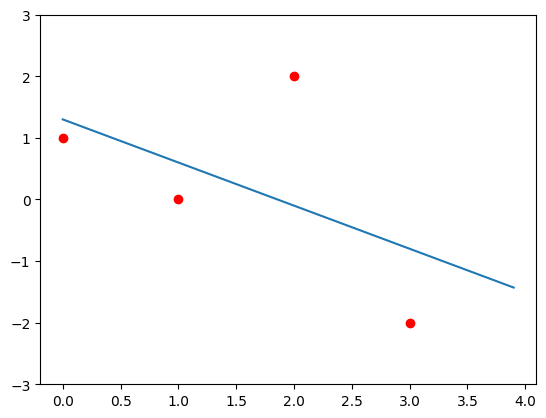

In [523]:
plt.scatter(X[:,0] ,y, color='red')
plt.plot(x,ŷ)
plt.ylim(-3,3)
plt.show()

## Question 6

In [524]:
lunch = np.genfromtxt('lunch_wait_time.csv', delimiter=',')
lunch.shape

(200,)

In [525]:
sat = np.genfromtxt('SAT.csv', delimiter=',')
sat.shape

(800,)

In [526]:
age = np.genfromtxt('student_age.csv', delimiter=',')
age.shape

(800,)

[]

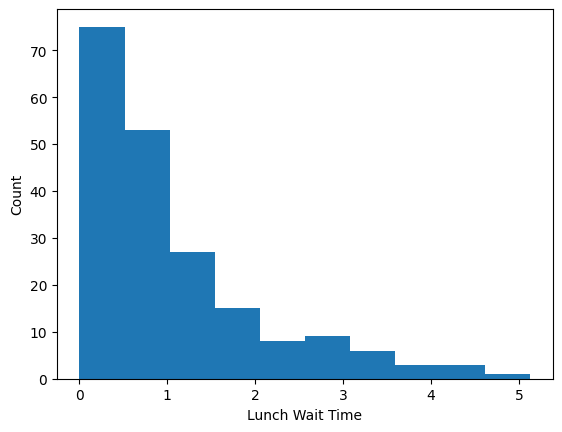

In [527]:
# 1
plt.hist(lunch)
plt.xlabel('Lunch Wait Time')
plt.ylabel('Count')
plt.plot()

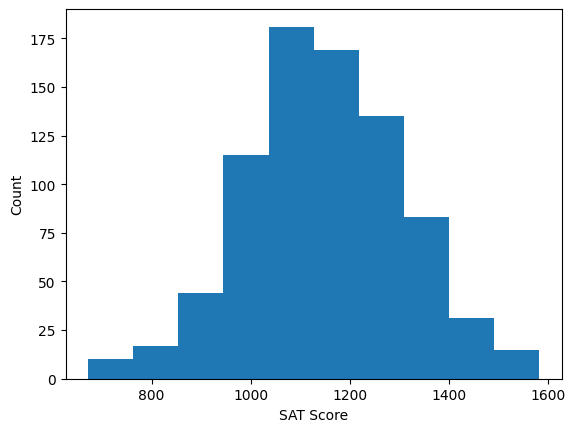

In [528]:
plt.hist(sat)
plt.xlabel('SAT Score')
plt.ylabel('Count')
plt.show()

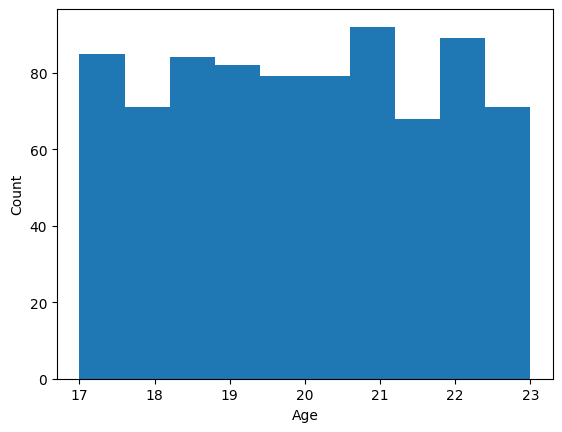

In [529]:
plt.hist(age)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [530]:
# 2
print(np.mean(lunch))
print(np.mean(sat))
print(np.mean(age))

1.0405
1147.82875
19.931625


In [531]:
total = 0
above_1200 = 0
for i in sat:
    total += 1
    if i > 1200:
        above_1200 += 1

print(above_1200 / total)

0.3575


In [532]:
total = 0
above_5min = 0
for i in lunch:
    total += 1
    if i > 5:
        above_5min += 1

print(above_5min / total)

0.005


In [533]:
total = 0
below_19 = 0
for i in age:
    total += 1
    if i < 19:
        below_19 += 1

print(below_19 / total)

0.34125


## Question 7

In [534]:
# b = 1.154